### Brazilian funds allocation
In this notebook we study the size of each type of fund.
We conclude that the FI type graetly dominates the funds universe, and that is why we, in the next notebbok, will investigate exclusively the FI funds.

In [1]:
# Input
date = '2018_09_21'
homePath = 'C:/Users/Mamed/Python4DS/'
projPath = homePath + 'FundsBR/'
strucPath = projPath + 'Structures_' + date + '/'
libsPath = projPath + 'Libs/'

In [332]:
import pandas as pd
import numpy as np
from collections import Counter
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [207]:
# Load my libraries
exec(open(libsPath + 'fundsLib.py').read())

In [208]:
# Read PL
dfPL = pd.read_pickle(strucPath + 'PL_.pkl')
dfPL.shape

(1691022, 5)

In [209]:
# Sample
dfPL.head()

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_COMPTC,VL_PATRIM_LIQ
0,FACFIF,00.000.756/0001-30,FAC ITAÚ RENDA FIXA - FUNDO DE INVESTIMENTO EM...,2005-01-31,7027838.60
1,FACFIF,00.000.756/0001-30,FAC ITAÚ RENDA FIXA - FUNDO DE INVESTIMENTO EM...,2005-02-28,6945342.89
2,FACFIF,00.000.777/0001-56,SANTANDER FUNDO DE INVESTIMENTO EM COTAS DE FU...,2005-01-31,20656283.24
3,FACFIF,00.000.777/0001-56,SANTANDER FUNDO DE INVESTIMENTO EM COTAS DE FU...,2005-02-28,20492770.98
4,FACFIF,00.000.777/0001-56,SANTANDER FUNDO DE INVESTIMENTO EM COTAS DE FU...,2005-03-31,20506270.50


In [210]:
# Convert date columns from string to timestamp
dfPL['DT_COMPTC'] = dfPL['DT_COMPTC'].apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d"))

#### Total PL

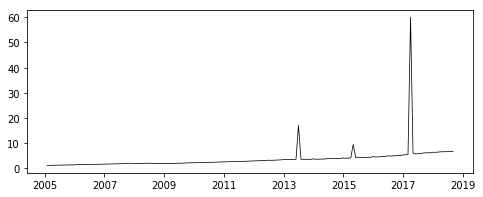

In [213]:
# Total PL: group by date, sum and transfor units to trillions
dfSum = dfPL.groupby(['DT_COMPTC'])['VL_PATRIM_LIQ'].sum() / 10**12

fig = plt.figure(figsize = (8, 3))
plt.plot(dfSum, 'k', linewidth = 0.75)
plt.show()

#### We can see three some errors in data, lets locate it and substitute by time neighbors interpolation

In [214]:
# We have to run 'interpOut' three times
dfPL = interpOutlier(dfPL)

Outlier:            
10.786.628/0001-18  
MARBELLA II - FUNDO DE INVESTIMENTO  RENDA FIXA
2017-03-31
54,644,230,171,628.50

Neighbors values:    3,202,105,735.78     3,189,279,604.93    
Updated to:          3,195,692,670.36    


In [215]:
dfPL = interpOutlier(dfPL)

Outlier:            
12.553.578/0001-54  
PLATINUM CAPITAL ABSOLUTO FUNDO DE INVESTIMENTO DE AÇÕES
2013-06-30
13,416,248,833,167.33

Neighbors values:    4,284,517.09         3,992,288.52        
Updated to:          4,138,402.80        


In [216]:
dfPL = interpOutlier(dfPL)

Outlier:            
07.901.425/0001-10  
INFINITY EAGLE FUNDO DE INVESTIMENTO MULTIMERCADO
2015-04-30
5,364,276,861,426.34

Neighbors values:    2,597,203.18         2,542,392.50        
Updated to:          2,569,797.84        


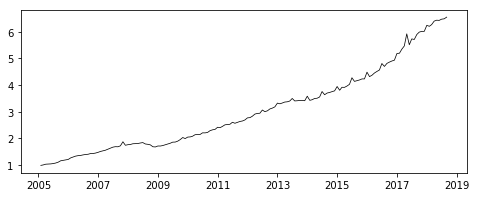

In [217]:
# Total PL: group by date, sum and transfor units to trillions
dfSum = dfPL.groupby(['DT_COMPTC'])['VL_PATRIM_LIQ'].sum() / 10**12

fig = plt.figure(figsize = (8, 3))
plt.plot(dfSum, 'k', linewidth = 0.75)
plt.show()

#### Cheking PL evolution by fund type

In [236]:
# Fund types
field = 'TP_FUNDO'
aux = list(map(list, zip(*list(Counter(dfPL[field]).items()))))
fundTypes = aux[0]
print(fundTypes)

['FACFIF', 'FAPI', 'FI', 'FIC-FITVM', 'FIEX', 'FIF', 'FIFDIV', 'FIIM', 'FIP', 'FITVM', 'FMAI', 'FMIEE', 'FMP-FGTS', 'FMP-FGTS CL', 'FUNCINE', 'FI-FGTS']


In [247]:
# Group by fund type and date, adding the PL in trillions
dfTypeSum = dfPL.groupby(['TP_FUNDO', 'DT_COMPTC'])['VL_PATRIM_LIQ'].sum() \
    / 10**12
dfTypeSum = dfTypeSum.unstack(level = 0)
dfTypeSum.head()

TP_FUNDO,FACFIF,FAPI,FI,FI-FGTS,FIC-FITVM,FIEX,FIF,FIFDIV,FIIM,FIP,FITVM,FMAI,FMIEE,FMP-FGTS,FMP-FGTS CL,FUNCINE
DT_COMPTC,,,,,,,,,,,,,,,,
2005-01-31,0.296490,NaN,0.109737,NaN,0.002821,0.002201,0.518977,0.007230,0.000390,NaN,0.036293,0.000007,NaN,0.006915,0.000011,NaN
2005-02-28,0.264067,NaN,0.250221,NaN,0.002961,0.001882,0.427480,0.007256,0.000435,NaN,0.035352,0.000008,NaN,0.008023,0.000012,NaN
2005-03-31,0.040634,NaN,0.858053,NaN,0.000369,0.000063,0.104806,0.007803,0.000380,NaN,0.006247,0.000007,NaN,0.007340,0.000012,0.000004
2005-04-30,0.000244,NaN,1.020416,NaN,0.000004,0.000000,0.002453,0.000060,0.000342,NaN,0.000013,0.000008,NaN,0.006373,0.000011,NaN
2005-05-31,0.000220,NaN,1.026809,NaN,0.000004,0.000000,0.002556,0.000048,0.000341,NaN,0.000013,0.000008,NaN,0.006611,0.000011,NaN


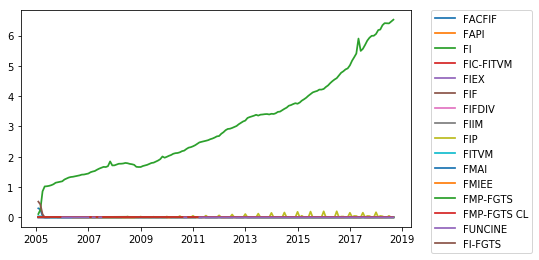

In [269]:
fig = plt.figure(figsize = (7, 4))
ax = fig.add_subplot(1,1,1)

# Plot each type
for ft in fundTypes:
    #if ft not in ['FI', 'FI-FGTS', 'FIF', 'FACFIF', 'FIP', 'FITVM', 'FMP-FGTS']:
    plt.plot(dfTypeSum.index, dfTypeSum[ft].values, linewidth = 1.75, label = ft)

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### In percentage

In [265]:
dfTypeSum['total'] = dfTypeSum[list(dfTypeSum)].sum(axis=1)
dfTypeSumPerc = dfTypeSum.div(dfTypeSum.total, axis='index')
dfTypeSumPerc.head()

TP_FUNDO,FACFIF,FAPI,FI,FI-FGTS,FIC-FITVM,FIEX,FIF,FIFDIV,FIIM,FIP,FITVM,FMAI,FMIEE,FMP-FGTS,FMP-FGTS CL,FUNCINE,total
DT_COMPTC,,,,,,,,,,,,,,,,,
2005-01-31,0.151105,NaN,0.055927,NaN,0.001438,0.001122,0.264495,0.003684,0.000199,NaN,0.018497,0.000004,NaN,0.003524,0.000006,NaN,1.0
2005-02-28,0.132338,NaN,0.125400,NaN,0.001484,0.000943,0.214234,0.003637,0.000218,NaN,0.017717,0.000004,NaN,0.004021,0.000006,NaN,1.0
2005-03-31,0.019807,NaN,0.418269,NaN,0.000180,0.000031,0.051089,0.003804,0.000185,NaN,0.003045,0.000004,NaN,0.003578,0.000006,0.000002,1.0
2005-04-30,0.000118,NaN,0.495384,NaN,0.000002,0.000000,0.001191,0.000029,0.000166,NaN,0.000006,0.000004,NaN,0.003094,0.000005,NaN,1.0
2005-05-31,0.000106,NaN,0.495267,NaN,0.000002,0.000000,0.001233,0.000023,0.000164,NaN,0.000006,0.000004,NaN,0.003189,0.000005,NaN,1.0


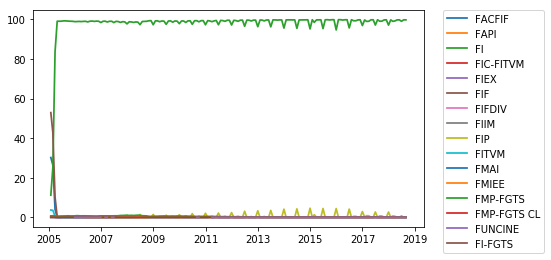

In [270]:
fig = plt.figure(figsize = (7, 4))
ax = fig.add_subplot(1,1,1)

# Plot each type
for ft in fundTypes:
    plt.plot(dfTypeSum.index, percent[ft].values, linewidth = 1.75, label = ft)

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Only the FI type

In [320]:
dfFI = dfPL[dfPL['TP_FUNDO'] == 'FI']
dfFI = dfFI.reset_index(drop = True)

In [347]:
# Group by date, adding and counting the PL in trillions
dfFIsum = dfFI.groupby(['DT_COMPTC'])['VL_PATRIM_LIQ'].sum() / 10**12
dfFIcount = dfFI.groupby(['DT_COMPTC'])['VL_PATRIM_LIQ'].count()
dfFImeanPL = (dfFIsum / dfFIcount) * 10**6

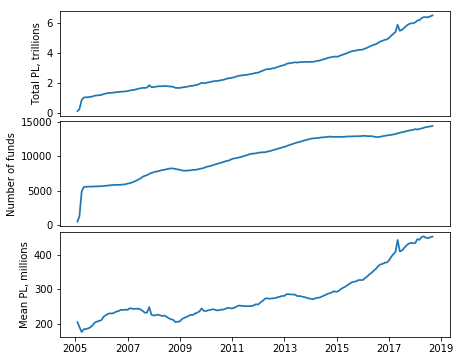

In [349]:
fig = plt.figure(figsize = (7, 6))
gs = gridspec.GridSpec(ncols = 1, nrows = 3, hspace = 0.05)

ax = fig.add_subplot(gs[0, 0])
plt.plot(dfFIsum.index, dfFIsum, linewidth = 1.75)
ax.get_xaxis().set_ticks([])
plt.ylabel('Total PL, trillions')

ax = fig.add_subplot(gs[1, 0])
plt.plot(dfFIcount.index, dfFIcount, linewidth = 1.75)
ax.get_xaxis().set_ticks([])
plt.ylabel('Number of funds')

ax = fig.add_subplot(gs[2, 0])
plt.plot(dfFImeanPL.index, dfFImeanPL, linewidth = 1.75)
plt.ylabel('Mean PL, millions')

plt.show()